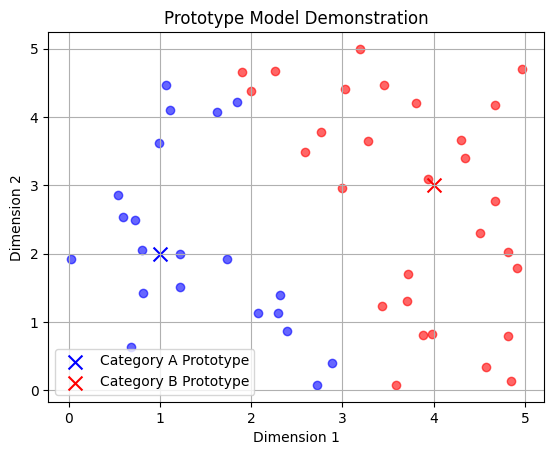

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define prototypes for two categories
prototypes = {
    "Category A": np.array([1.0, 2.0]),
    "Category B": np.array([4.0, 3.0])
}

# Function to generate random stimuli
def generate_stimuli(num_stimuli, dimensions, bounds=(0, 5)):
    return np.random.uniform(bounds[0], bounds[1], (num_stimuli, dimensions))

# Function to calculate similarity (Euclidean distance)
def calculate_similarity(stimulus, prototype):
    return -np.linalg.norm(stimulus - prototype)  # Negative for similarity (smaller distance is better)

# Categorize stimuli based on similarity
def categorize_stimuli(stimuli, prototypes):
    categories = []
    for stimulus in stimuli:
        similarities = {
            category: calculate_similarity(stimulus, prototype)
            for category, prototype in prototypes.items()
        }
        best_category = max(similarities, key=similarities.get)
        categories.append((stimulus, best_category))
    return categories

# Visualize prototypes, stimuli, and categories
def visualize_results(prototypes, categorized_stimuli):
    colors = {"Category A": "blue", "Category B": "red"}
    
    # Plot prototypes
    for category, prototype in prototypes.items():
        plt.scatter(*prototype, color=colors[category], marker='x', s=100, label=f"{category} Prototype")
    
    # Plot stimuli
    for stimulus, category in categorized_stimuli:
        plt.scatter(*stimulus, color=colors[category], alpha=0.6)
    
    plt.legend()
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Prototype Model Demonstration")
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    num_stimuli = 50
    dimensions = 2
    stimuli = generate_stimuli(num_stimuli, dimensions)
    categorized_stimuli = categorize_stimuli(stimuli, prototypes)
    visualize_results(prototypes, categorized_stimuli)


Epoch [100/500], Loss: 0.3560
Epoch [200/500], Loss: 0.3369
Epoch [300/500], Loss: 0.3301
Epoch [400/500], Loss: 0.3270
Epoch [500/500], Loss: 0.3253


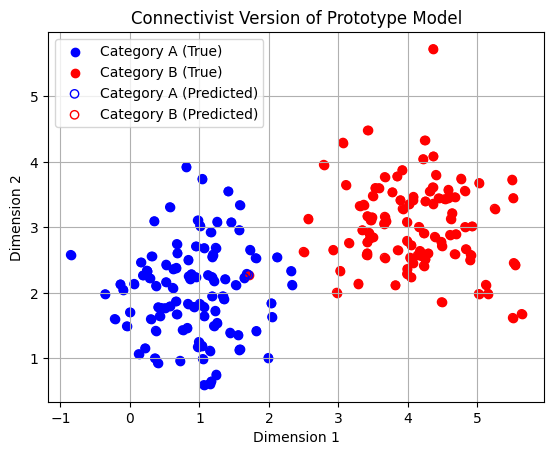

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Generate synthetic data
def generate_data(num_samples=100):
    np.random.seed(42)
    category_a = np.random.multivariate_normal([1.0, 2.0], [[0.5, 0], [0, 0.5]], num_samples // 2)
    category_b = np.random.multivariate_normal([4.0, 3.0], [[0.5, 0], [0, 0.5]], num_samples // 2)
    data = np.vstack((category_a, category_b))
    labels = np.array([0] * (num_samples // 2) + [1] * (num_samples // 2))
    return data, labels

# Define the neural network
class PrototypeNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(PrototypeNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x

# Training the model
def train_model(model, data, labels, epochs=500, lr=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    for epoch in range(epochs):
        inputs = torch.FloatTensor(data)
        targets = torch.LongTensor(labels)
        
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 100 == 0:
            print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

# Main execution
if __name__ == "__main__":
    # Data preparation
    data, labels = generate_data(200)
    
    # Model initialization
    input_dim = 2
    hidden_dim = 4
    output_dim = 2
    model = PrototypeNN(input_dim, hidden_dim, output_dim)
    
    # Training
    train_model(model, data, labels)
    
    # Visualize predictions
    with torch.no_grad():
        inputs = torch.FloatTensor(data)
        predictions = model(inputs).argmax(dim=1).numpy()
    
    # Plot results
    import matplotlib.pyplot as plt
    plt.scatter(data[labels == 0, 0], data[labels == 0, 1], color="blue", label="Category A (True)")
    plt.scatter(data[labels == 1, 0], data[labels == 1, 1], color="red", label="Category B (True)")
    plt.scatter(data[predictions == 0, 0], data[predictions == 0, 1], edgecolor="blue", facecolor="none", label="Category A (Predicted)")
    plt.scatter(data[predictions == 1, 0], data[predictions == 1, 1], edgecolor="red", facecolor="none", label="Category B (Predicted)")
    plt.legend()
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.title("Connectivist Version of Prototype Model")
    plt.grid(True)
    plt.show()


Hidden Layer Weights (Prototypes):
[[-0.4425632  -0.46367475]
 [-0.7496163   0.34507167]
 [ 1.2355059   0.57085943]
 [-0.4804469   0.20050204]]


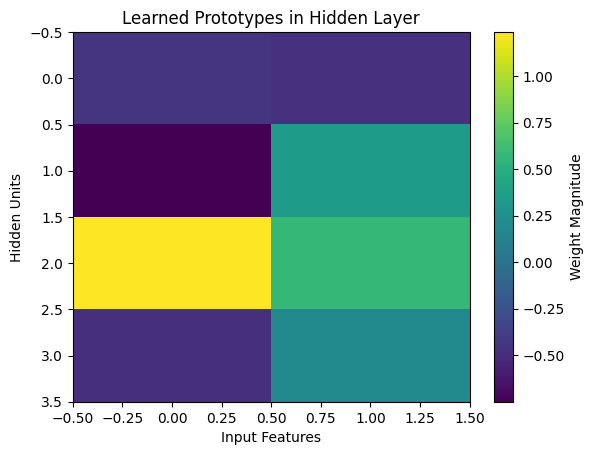

In [5]:
# Access weights from the trained model
prototypes_hidden = model.fc1.weight.detach().numpy()
print("Hidden Layer Weights (Prototypes):")
print(prototypes_hidden)

# Optionally, visualize the weights
plt.imshow(prototypes_hidden, cmap='viridis', aspect='auto')
plt.colorbar(label="Weight Magnitude")
plt.xlabel("Input Features")
plt.ylabel("Hidden Units")
plt.title("Learned Prototypes in Hidden Layer")
plt.show()

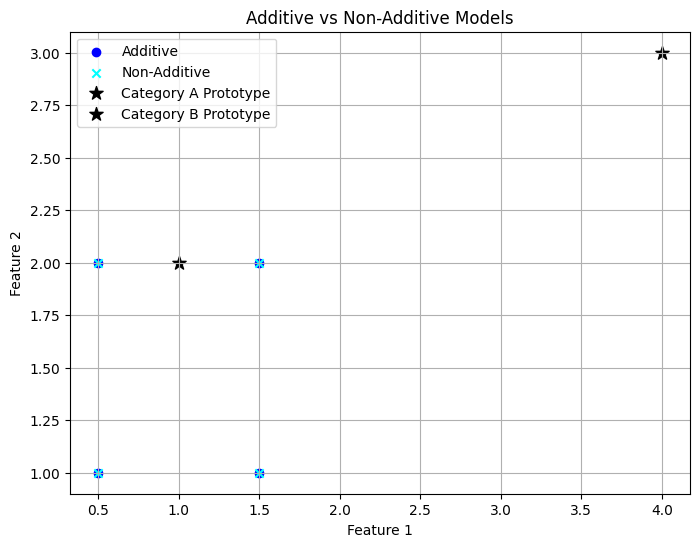

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define prototypes for two categories
prototypes = {
    "Category A": np.array([1.0, 2.0]),
    "Category B": np.array([4.0, 3.0])
}

# Define levels for two factors (Feature 1 and Feature 2)
feature_1_levels = np.array([0.5, 1.5])
feature_2_levels = np.array([1.0, 2.0])

# Simulate stimuli: combinations of feature levels
stimuli = np.array([[f1, f2] for f1 in feature_1_levels for f2 in feature_2_levels])

# Additive similarity calculation
def additive_similarity(stimulus, prototype):
    return -np.linalg.norm(stimulus - prototype)

# Non-additive similarity calculation (introducing a crossover interaction)
def non_additive_similarity(stimulus, prototype):
    f1, f2 = stimulus
    p1, p2 = prototype
    # Introduce interaction between Feature 1 and Feature 2
    interaction_term = 0.5 * f1 * f2
    return -(np.linalg.norm(stimulus - prototype) + interaction_term)

# Compute and compare additive vs non-additive models
def compare_models(stimuli, prototypes):
    results = {"Additive": [], "Non-Additive": []}
    for stimulus in stimuli:
        additive_scores = {cat: additive_similarity(stimulus, proto) for cat, proto in prototypes.items()}
        non_additive_scores = {cat: non_additive_similarity(stimulus, proto) for cat, proto in prototypes.items()}
        
        results["Additive"].append(max(additive_scores, key=additive_scores.get))
        results["Non-Additive"].append(max(non_additive_scores, key=non_additive_scores.get))
    return results

# Visualization of crossover interaction
def visualize_crossover(stimuli, prototypes, results):
    plt.figure(figsize=(8, 6))
    
    for i, stimulus in enumerate(stimuli):
        label_add = results["Additive"][i]
        label_non_add = results["Non-Additive"][i]
        color_add = "blue" if label_add == "Category A" else "red"
        color_non_add = "cyan" if label_non_add == "Category A" else "orange"
        
        plt.scatter(*stimulus, color=color_add, marker="o", label="Additive" if i == 0 else "")
        plt.scatter(*stimulus, color=color_non_add, marker="x", label="Non-Additive" if i == 0 else "")
    
    for cat, proto in prototypes.items():
        plt.scatter(*proto, color="black", marker="*", s=100, label=f"{cat} Prototype")
    
    plt.title("Additive vs Non-Additive Models")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.grid(True)
    plt.show()

# Main execution
if __name__ == "__main__":
    # Compare models
    results = compare_models(stimuli, prototypes)
    
    # Visualize results
    visualize_crossover(stimuli, prototypes, results)
